

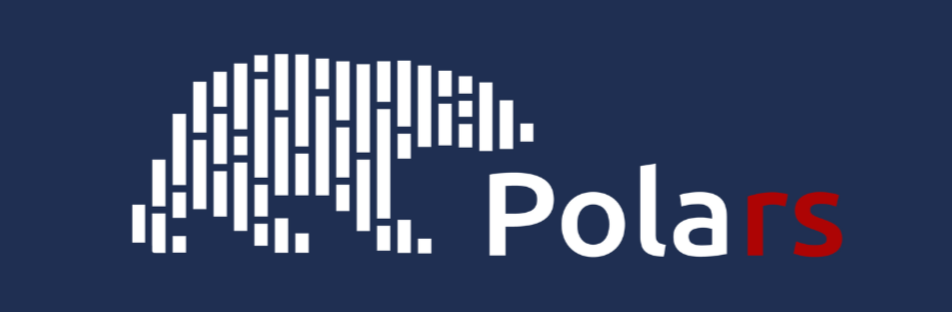

Polars is a high-performance DataFrame library designed to provide fast and efficient data processing capabilities. It offers a seamless experience for working with large datasets that might not fit into memory
. Inspired by the pandas library, Polars takes data processing to another level, offering massive performance boosts and lightning-fast execution.


**[Features:](https://pola.rs/)**
- Fast
- Easy to use
- Open source

In [1]:
# install polars
!pip install polars

In this notebook I will be using the famous [Gapminder dataset](https://pypi.org/project/gapminder/).

In [2]:
# install inbuilt gapminder dataset
!pip install gapminder

In [3]:
# import gapminder dataset
from gapminder import gapminder
# read the head
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


**import polars:**

In [4]:
import polars as pl

**from pandas to polar:**

In [5]:
# read dataset from pandas dataframe to polars dataframe
df_gapminder = pl.from_pandas(gapminder)

**SQL:** - [Polar Sql interface](https://docs.pola.rs/api/python/stable/reference/sql/index.html)

In [9]:
# create a SQLContext
ctx = pl.SQLContext(gapminder=df_gapminder)

**example:**

In [25]:
# show tables present
ctx.execute("SHOW TABLES", eager=True)

name
str
"""gapminder"""


In [26]:
# using the .tables() method
ctx.tables()

['gapminder']

In [18]:
# running an SQL query on polars

# example.1
ctx.execute(
    '''
    SELECT *
    FROM gapminder
    WHERE continent = 'Asia' and year between 2000 and 2004
    ''',
    eager=True
).head()

country,continent,year,lifeExp,pop,gdpPercap
str,str,i64,f64,i64,f64
"""Afghanistan""","""Asia""",2002,42.129,25268405,726.734055
"""Bahrain""","""Asia""",2002,74.795,656397,23403.55927
"""Bangladesh""","""Asia""",2002,62.013,135656790,1136.39043
"""Cambodia""","""Asia""",2002,56.752,12926707,896.226015
"""China""","""Asia""",2002,72.028,1280400000,3119.280896


In [23]:
# example.2
ctx.execute(
    '''
    SELECT country, year, gdpPercap
    FROM gapminder
    WHERE gdpPercap = max(gdpPercap)
    ''',
    eager=True
).head()

country,year,gdpPercap
str,i64,f64
"""Kuwait""",1957,113523.1329


In [29]:
# example.2
ctx.execute(
    '''
    SELECT continent, avg(gdpPercap) as avg_gdpPercap
    FROM gapminder
    group by continent
    ''',
    eager=True
).head()

continent,avg_gdpPercap
str,f64
"""Asia""",7902.150428
"""Americas""",7136.110356
"""Europe""",14469.475533
"""Oceania""",18621.609223
"""Africa""",2193.754578


###**Try other [SQL functions](https://docs.pola.rs/api/python/stable/reference/sql/index.html) on the Polar SQLcontext**